In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier # model
from xgboost import plot_importance as xgb_plot_importance# 중요변수 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model


from sklearn.metrics import roc_curve,confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE
%matplotlib inline

from sklearn.utils.class_weight import compute_class_weight

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df_onehot = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_label = pd.read_csv('label_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_dropna = pd.read_csv('onehotdropna_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_mo1 = df_onehot.drop(['age','pdays','previous'],axis=1)
df_mo2 = df_label.drop(['age','pdays','previous'],axis=1)
df_onehot.columns

Index(['age', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single',
       'marital_unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'university.degree', 'professional.course',
       'edu_unknown', 'default_no', 'default_yes', 'default_unknown',
       'house_no', 'house_yes', 'house_unknown', 'loan_no', 'loan_yes',
       'loan_unknown', 'pdays', 'previous', 'pout_no', 'pout_yes',
       'pout_unknown', 'y'],
      dtype='object')

In [5]:
def score(a,b,c):
    confusion = np.round(confusion_matrix(a,b),3)
    accuracy = np.round(accuracy_score(a,b),3)
    precision = np.round(precision_score(a,b),3)
    recall = np.round(recall_score(a,b),3)
    f1 = np.round(f1_score(a,b),3)
    
    roc_auc = np.round(roc_auc_score(a,b),3)
    
#     print(f'Confusion Matrix of {c}')
#     display(pd.DataFrame(confusion))
#     sns.heatmap(confusion, annot=True, fmt='d')
#     plt.show()
    
    return confusion,pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[c])

def classification(X,y,method = None):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    smote_sample = SMOTE(sampling_strategy=0.2) 
    X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    
    if method == 'under':
        X_train, y_train = X_under, y_under
    elif method == 'over':
        X_train, y_train = X_over, y_over
    elif method == 'smote':
        X_train, y_train = X_sm, y_sm

    model = LGBMClassifier(random_state=0)
    model.fit(X_train,y_train)
    ligt_gbm = model.predict(X_test)
    ligt_gbm_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
    model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0)
    model.fit(X_train,y_train)
    ligt_gbm_2 = model.predict(X_test)
    ligt_gbm_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model= XGBClassifier(random_state=0)
    model.fit(X_train, y_train)
    xgb_1 = model.predict(X_test)
    xgb_1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_1_opt = pd.DataFrame(xgb_1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 5,random_state=0)
    evals = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "logloss", eval_set = evals, verbose = 0)
    xgb_2 = model.predict(X_test)
    xgb_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_2_opt = pd.DataFrame(xgb_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model=RandomForestClassifier(random_state=0)
    model.fit(X_train,y_train)
    rf1=model.predict(X_test)
    rf1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(rf1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     rf1_opt = pd.DataFrame(rf1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model=DecisionTreeClassifier(random_state=0)
    model.fit(X_train,y_train)
    df1=model.predict(X_test)
    df1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(df1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     df1_opt = pd.DataFrame(df1_proba).loc[:,1]>= optimal_threshold
    
    
    
    knc_model = KNeighborsClassifier()
    knc_model.fit(X_train,y_train) #학습
    knn = knc_model.predict(X_test)
    knn_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(knn_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     knn_opt = pd.DataFrame(knn_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = Sequential()
    model.add(Dense(32,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn = model.predict(X_test)
    dnn = pd.DataFrame(data=dnn).astype('float64')
    dnn[0]=dnn[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    
    confusion1,score1 = score(y_test,ligt_gbm,'ligt_gbm_1')
    confusion2,score2  = score(y_test,ligt_gbm_2,'ligt_gbm_2')
    confusion3,score3 = score(y_test,xgb_1,'xgb_1')
    confusion4,score4  = score(y_test,xgb_2,'xgb_2')
    confusion5,score5  = score(y_test,rf1,'rf1')
    confusion6,score6  = score(y_test,df1,'df1')
    confusion7,score7  = score(y_test,knn,'knn')
    confusion8,score8  = score(y_test,dnn[0],'dnn')
    
    


        
    df = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8],axis=1)
    return np.round(df,3)

# 모델의 예측 성능 비교
## 원데이터 학습(샘플링 방식에 따라 구분)

None sampling
387/387 [==============================] - 0s 962us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.895,0.897,0.894,0.897,0.876,0.866,0.885,0.897
precision,0.607,0.644,0.595,0.645,0.400,0.333,0.476,0.623
recall,0.196,0.193,0.178,0.196,0.214,0.193,0.191,0.211
f1,0.296,0.297,0.274,0.300,0.279,0.244,0.272,0.315
roc_auc,0.590,0.590,0.581,0.591,0.587,0.572,0.582,0.597
score,0.717,0.752,0.695,0.755,0.520,0.441,0.583,0.741


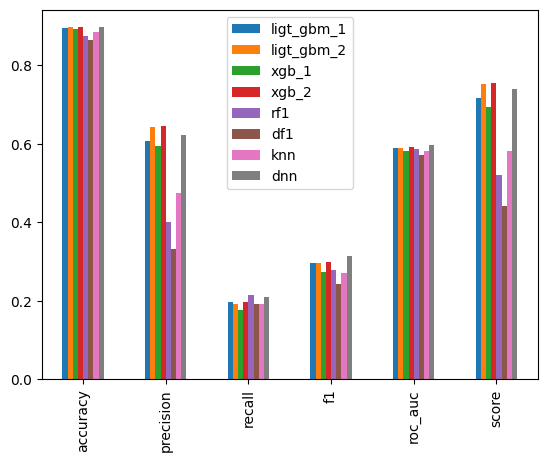

under sampling
387/387 [==============================] - 0s 908us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.719,0.747,0.692,0.746,0.605,0.621,0.766,0.765
precision,0.209,0.224,0.191,0.226,0.156,0.156,0.219,0.233
recall,0.537,0.509,0.539,0.519,0.569,0.539,0.420,0.478
f1,0.301,0.311,0.282,0.315,0.245,0.242,0.288,0.313
roc_auc,0.640,0.643,0.625,0.647,0.589,0.585,0.615,0.639
score,0.510,0.509,0.493,0.517,0.475,0.458,0.454,0.501


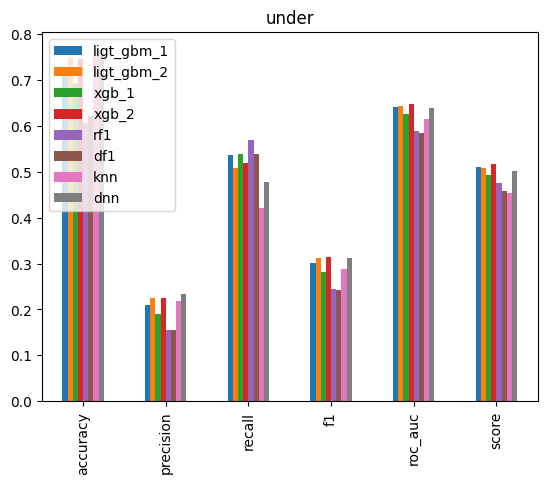

over sampling
387/387 [==============================] - 0s 932us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.784,0.796,0.762,0.768,0.739,0.736,0.832,0.800
precision,0.249,0.264,0.221,0.235,0.186,0.172,0.280,0.269
recall,0.456,0.454,0.443,0.472,0.389,0.355,0.315,0.455
f1,0.322,0.334,0.295,0.314,0.252,0.232,0.297,0.338
roc_auc,0.641,0.647,0.623,0.639,0.587,0.569,0.606,0.649
score,0.504,0.518,0.469,0.499,0.404,0.371,0.456,0.524


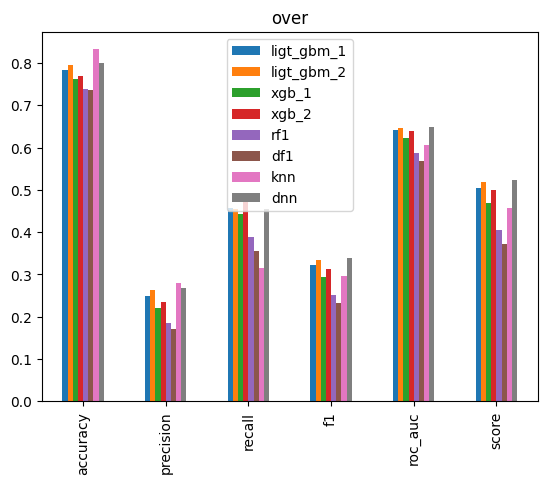

smote sampling
387/387 [==============================] - 0s 960us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.897,0.898,0.895,0.897,0.874,0.865,0.866,0.897
precision,0.628,0.641,0.603,0.648,0.391,0.335,0.364,0.643
recall,0.200,0.207,0.186,0.192,0.225,0.206,0.253,0.196
f1,0.303,0.312,0.284,0.297,0.285,0.255,0.298,0.300
roc_auc,0.593,0.596,0.585,0.590,0.590,0.577,0.598,0.591
score,0.740,0.757,0.707,0.756,0.517,0.450,0.506,0.753


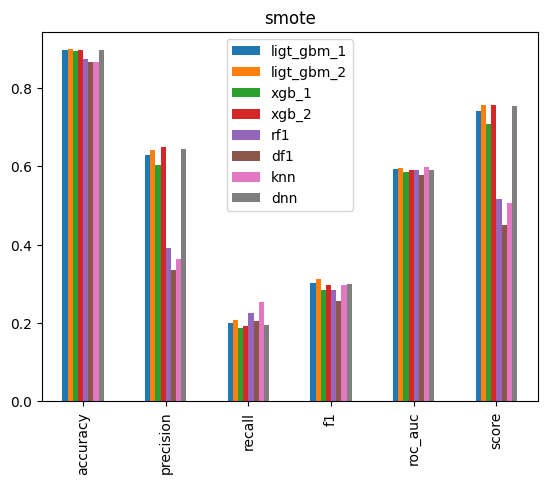

In [6]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

None sampling
286/286 [==============================] - 0s 955us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.882,0.879,0.883,0.862,0.860,0.872,0.883
precision,0.637,0.645,0.594,0.646,0.422,0.398,0.499,0.630
recall,0.176,0.182,0.176,0.188,0.196,0.177,0.182,0.207
f1,0.276,0.284,0.271,0.292,0.268,0.245,0.267,0.312
roc_auc,0.581,0.584,0.579,0.587,0.578,0.569,0.578,0.595
score,0.736,0.747,0.693,0.751,0.532,0.497,0.601,0.746


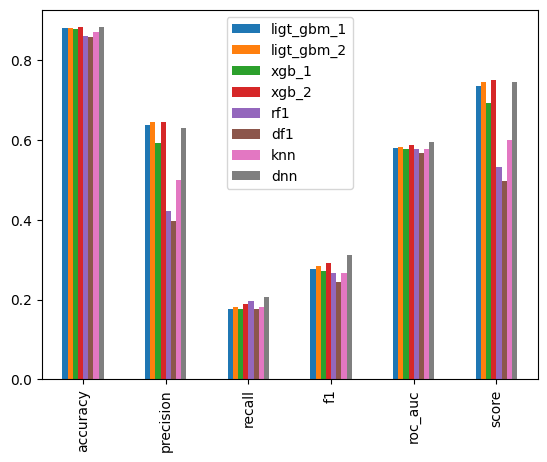

under sampling
286/286 [==============================] - 0s 914us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.755,0.776,0.723,0.800,0.606,0.644,0.775,0.855
precision,0.248,0.271,0.227,0.299,0.175,0.181,0.257,0.415
recall,0.447,0.442,0.483,0.416,0.559,0.506,0.398,0.325
f1,0.319,0.336,0.309,0.348,0.267,0.267,0.312,0.364
roc_auc,0.624,0.634,0.621,0.636,0.586,0.585,0.614,0.629
score,0.498,0.519,0.497,0.532,0.488,0.464,0.480,0.597


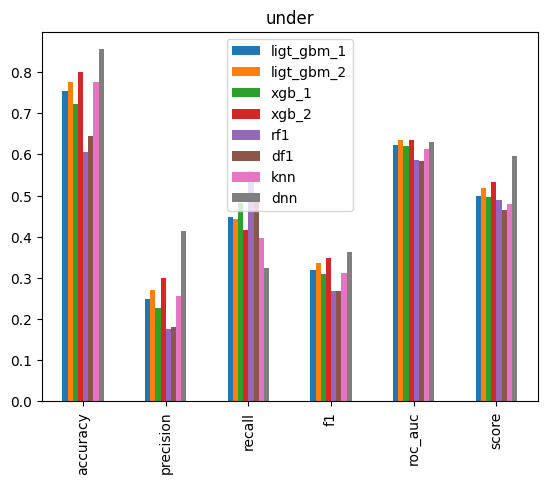

over sampling
286/286 [==============================] - 0s 944us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.780,0.801,0.759,0.781,0.698,0.692,0.837,0.807
precision,0.274,0.302,0.249,0.275,0.192,0.177,0.336,0.311
recall,0.432,0.421,0.438,0.430,0.423,0.384,0.278,0.413
f1,0.336,0.352,0.318,0.335,0.264,0.242,0.304,0.355
roc_auc,0.632,0.639,0.622,0.631,0.580,0.560,0.599,0.639
score,0.516,0.538,0.494,0.516,0.429,0.392,0.492,0.542


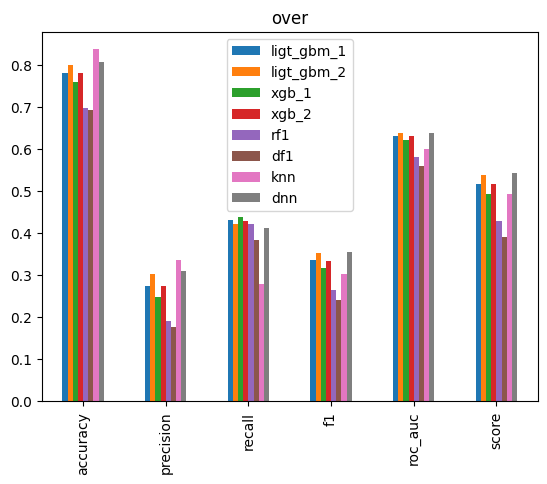

smote sampling
286/286 [==============================] - 0s 979us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.883,0.882,0.880,0.882,0.861,0.857,0.864,0.882
precision,0.636,0.628,0.606,0.638,0.414,0.385,0.442,0.626
recall,0.198,0.190,0.192,0.189,0.205,0.187,0.222,0.204
f1,0.302,0.292,0.291,0.292,0.274,0.251,0.295,0.307
roc_auc,0.591,0.587,0.587,0.587,0.581,0.571,0.590,0.593
score,0.747,0.734,0.714,0.744,0.529,0.490,0.566,0.740


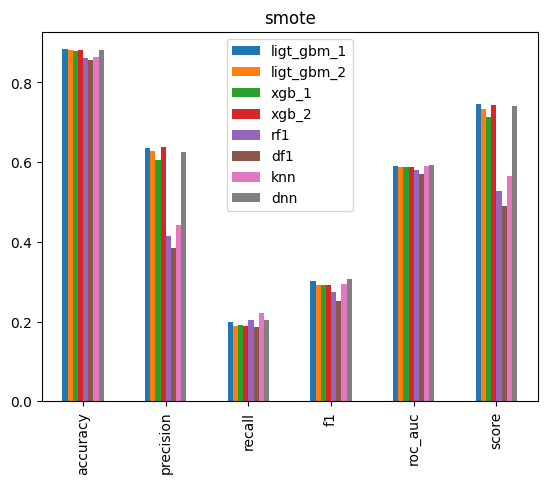

In [7]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

# 최적 모델 탐색
## 원데이터 학습(샘플링 방식에 따라 구분)

In [8]:
df_onehot_none = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'])
df_onehot_under = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'under')
df_onehot_over = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'over')
df_onehot_smote = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'smote')

387/387 [==============================] - 0s 982us/step


In [9]:
def best_score(df,i):
    for j in i:
        dt = df.loc[j,:]
        a = pd.DataFrame(dt[dt==max(dt)])
        print(f'best of {j}:',dt[dt==max(dt)])
        print('')

        
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: ligt_gbm_2    0.897
xgb_2         0.897
dnn           0.897
Name: accuracy, dtype: float64

best of precision: dnn    0.657
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: xgb_2    0.3
Name: f1, dtype: float64

best of roc_auc: xgb_2    0.591
Name: roc_auc, dtype: float64

best of score: dnn    0.757
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: xgb_2    0.807
Name: accuracy, dtype: float64

best of precision: xgb_2    0.275
Name: precision, dtype: float64

best of recall: dnn    0.605
Name: recall, dtype: float64

best of f1: xgb_2    0.338
Name: f1, dtype: float64

best of roc_auc: dnn    0.647
Name: roc_auc, dtype: float64

best of score: dnn    0.537
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: dnn    

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

In [10]:
df_dropna_none = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'])
df_dropna_under = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'under')
df_dropna_over = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'over')
df_dropna_smote = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'smote')

286/286 [==============================] - 0s 938us/step


In [11]:
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: ligt_gbm_2    0.897
xgb_2         0.897
dnn           0.897
Name: accuracy, dtype: float64

best of precision: dnn    0.657
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: xgb_2    0.3
Name: f1, dtype: float64

best of roc_auc: xgb_2    0.591
Name: roc_auc, dtype: float64

best of score: dnn    0.757
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: xgb_2    0.807
Name: accuracy, dtype: float64

best of precision: xgb_2    0.275
Name: precision, dtype: float64

best of recall: dnn    0.605
Name: recall, dtype: float64

best of f1: xgb_2    0.338
Name: f1, dtype: float64

best of roc_auc: dnn    0.647
Name: roc_auc, dtype: float64

best of score: dnn    0.537
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: dnn    

model = 

Confusion Matrix


,0,1
0,10805,163
1,1112,277


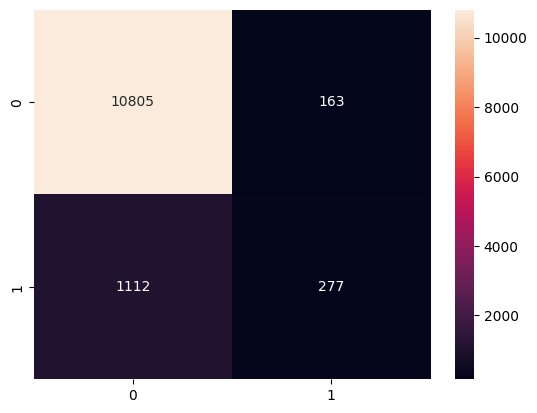

,0
accuracy,0.89700
precision,0.63000
recall,0.19900
f1,0.30300
roc_auc,0.59200
score,0.74144


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],test_size=0.3,random_state=42)
    

    
smote_sample = SMOTE(sampling_strategy=0.2) 
X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    

X_train, y_train = X_sm, y_sm

model = LGBMClassifier(random_state=0)
model.fit(X_train,y_train)
ligt_gbm = model.predict(X_test)

    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0)
model.fit(X_train,y_train)
ligt_gbm_2 = model.predict(X_test)

    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    

a= y_test
b = ligt_gbm
    
confusion = np.round(confusion_matrix(a,b),3)
accuracy = np.round(accuracy_score(a,b),3)
precision = np.round(precision_score(a,b),3)
recall = np.round(recall_score(a,b),3)
f1 = np.round(f1_score(a,b),3)

roc_auc = np.round(roc_auc_score(a,b),3)

print('Confusion Matrix')
display(pd.DataFrame(confusion))
sns.heatmap(confusion, annot=True, fmt='d')
plt.show()

pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[0])
